Is there a relationship between gross income for a movie and rating or public perception?

If a movie is on more streaming platforms, will it have higher ratings?

scipy stats correlation

# Do better rated movies receive more awards/nominations?

In [1]:
import pandas as pd
import numpy as np

In [26]:
awards = pd.read_csv('oscars.csv')
awards = awards[['Award', 'Winner', 'Name']]
awards = awards.rename(columns={"Name": "title", "Award":"award", "Winner":"winner"})
display(awards.head())

,award,winner,title
0,Actor,NaN,Richard Barthelmess
1,Actor,1.0,Emil Jannings
2,Actress,NaN,Louise Dresser
3,Actress,1.0,Janet Gaynor
4,Actress,NaN,Gloria Swanson


In [39]:
movies = pd.read_csv('imdb.csv')
movies = movies[['title', 'avg_vote']]
display(movies.head())

,title,avg_vote
0,Miss Jerry,5.9
1,The Story of the Kelly Gang,6.1
2,Den sorte drøm,5.8
3,Cleopatra,5.2
4,L'Inferno,7.0


In [81]:
merged = movies.merge(awards, how='inner', on='title')
def nan_fix(df):
    if str(df) == 'nan':
        return 'no'
    if df == 1.0:
        return 'yes'
merged['winner'] = merged['winner'].apply(nan_fix)
display(merged.head())

# will it be a problem if we have movies with the same name? or is it find since it counts it as two different movies?

,title,avg_vote,award,winner
0,Cinderella,6.0,Costume Design,no
1,Cinderella,5.6,Costume Design,no
2,Sis Hopkins,5.9,Art Direction (Black and White),no
3,Bill and Coo,5.6,Special Award,yes
4,Monsieur Vincent,7.0,Special Foreign Language Film Award,yes


In [82]:
won = merged[merged['winner'] == 1]
avg_rating_won = won['avg_vote'].agg(np.mean)
avg_rating_won

nan

In [83]:
lost = merged[merged['winner'] == 0]
avg_rating_lost = lost['avg_vote'].agg(np.mean)
avg_rating_lost

nan

In [96]:
plotting = merged[['avg_vote', 'winner']]
plotting = plotting.groupby('winner').agg(np.mean)
plotting = plotting.reset_index()
plotting

,winner,avg_vote
0,no,6.798113
1,yes,6.800000


In [97]:
import matplotlib.pyplot as plt

In [117]:
# ax = plotting.plot.bar(x='winner', y='avg_vote', rot=0, ylim = (6.79,6.8), color = 'darkolivegreen')
# ax

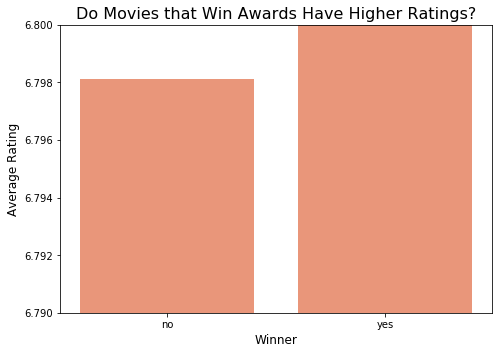

In [122]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
x = plotting['winner']
y = plotting['avg_vote']
ax1.bar(x,y, color='darksalmon')
ax1.set_xlabel('Winner', fontsize=12)
ax1.set_ylabel('Average Rating', fontsize=12)
ax1.set_ylim(6.79, 6.8)
ax1.set_title('Do Movies that Win Awards Have Higher Ratings?', fontsize=16)
plt.show()